In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [2]:
df_men = df[df['Gender'] == 'Male']

# Признаки и целевая переменная
X = df_men['Weight'].values
y = df_men['Height'].values

# Нормализация данных
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

In [3]:
def predict(w, b, X):
    return w * X + b

In [4]:
# Функция для вычисления ошибки
def mse_loss(params, X, y):
    w, b = params
    y_pred = predict(w, b, X)
    return np.mean((y_pred - y) ** 2)

In [5]:
initial_params = np.array([0, 0])

result = minimize(mse_loss, initial_params, args=(X, y), method='BFGS')
w_opt, b_opt = result.x

print(f"Оптимальные параметры: w = {w_opt:.4f}, b = {b_opt:.4f}")

Оптимальные параметры: w = 0.8630, b = -0.0000


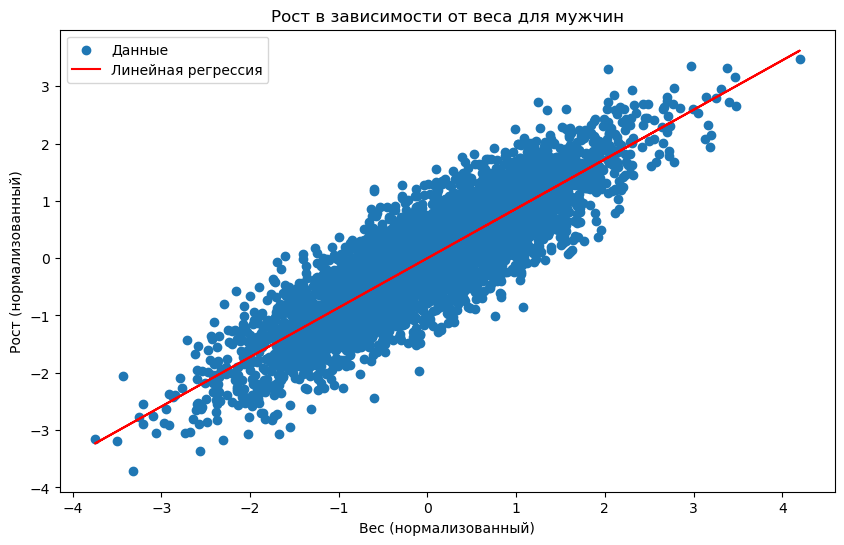

In [6]:
# Предсказания
y_pred = predict(w_opt, b_opt, X)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Данные')
plt.plot(X, y_pred, color='red', label='Линейная регрессия')
plt.xlabel('Вес (нормализованный)')
plt.ylabel('Рост (нормализованный)')
plt.title('Рост в зависимости от веса для мужчин')
plt.legend()
plt.show()